In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../data/biedronki.csv")
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [25]:
sns.set_style("whitegrid")

# Analiza oceny doświadczenia zakupowego

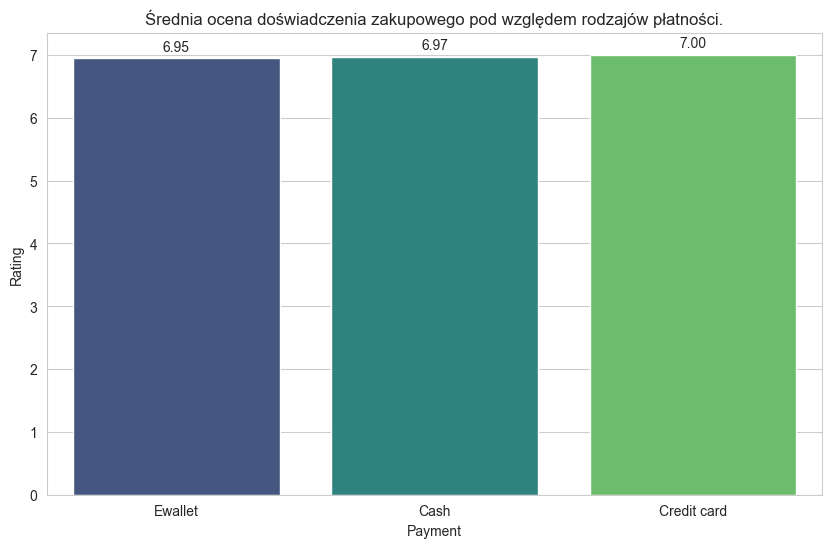

In [65]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=df, x='Payment', y='Rating', errorbar=None, estimator='mean', palette='viridis')
plt.title("Średnia ocena doświadczenia zakupowego pod względem rodzajów płatności.")
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 8), textcoords='offset points')

plt.show()


Wykres pokazuje, że rodzaj płatności nie wpływa na zadowolenie klienta, co w dobie rozwiniętych udogodnień związanych z płatnością elektroniczną, jest nierealistyczne. 

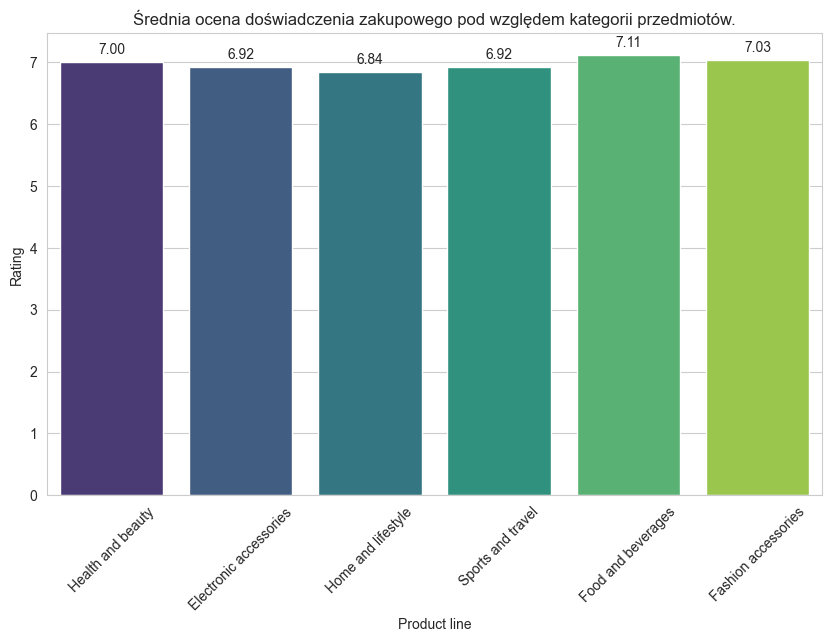

In [53]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=df, x='Product line', y='Rating', errorbar=None, estimator='mean', palette='viridis')
plt.xticks(rotation=45)
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 9), textcoords='offset points')
plt.title("Średnia ocena doświadczenia zakupowego pod względem kategorii przedmiotów.")
plt.show()

Na wykresie nie widać różnic między zadowoleniem klienta, a rodzajem produktów które kupuje. Jest to kolejny nierealistyczny aspekt posiadancyh danych ponieważ przy tak dużym zróżnicowaniu produktów, powinny istnieć większe różnice w zadowoleniu, szczególnie kiedy sklepy sieci Biedronka nie specjalizują się we wszystkich kategoriach.

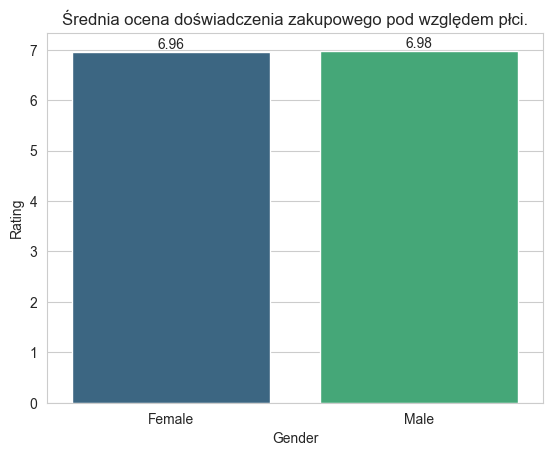

In [51]:
ax = sns.barplot(data=df, x='Gender', y='Rating', errorbar=None, estimator='mean', palette='viridis')
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')
plt.title("Średnia ocena doświadczenia zakupowego pod względem płci.")
plt.show()

Wykres pokazuje że mężczyźni i kobiety są tak samo zadowoleni z zakupów. 

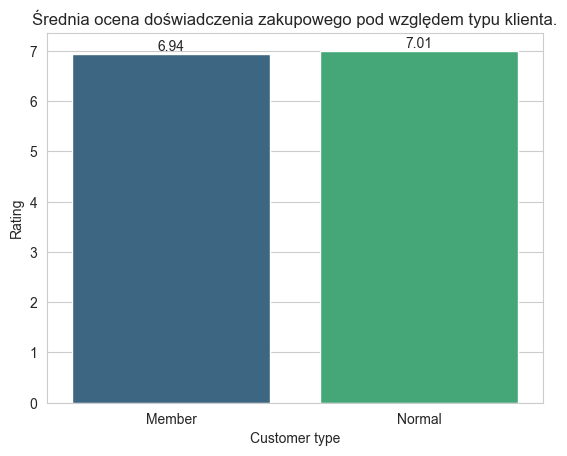

In [55]:
ax = sns.barplot(data=df, x='Customer type', y='Rating', errorbar=None, estimator='mean', palette='viridis')
plt.title("Średnia ocena doświadczenia zakupowego pod względem typu klienta.")
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

Na wykresie widzimy że zwykli klienci są tak samo zadowoleni jak klienci z kartą członkowską. Klienci z kartą członkowską powinni otrzymywać specjalne benefity, które powinny zwiększyć ich ocenę doświadczenia. Pokazuje to że albo te karty są bezużyteczne albo dane są błędne. 

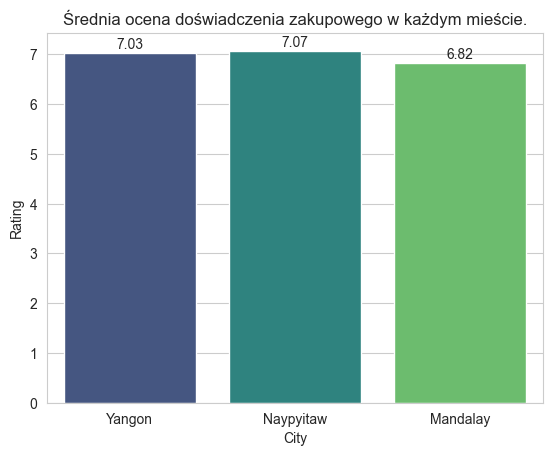

In [57]:
ax = sns.barplot(data=df, x='City', y='Rating', errorbar=None, estimator='mean', palette='viridis')
plt.title("Średnia ocena doświadczenia zakupowego w każdym mieście.")
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 6), textcoords='offset points')

Różnice średniej oceny doświadczenia zakupowego praktycznie nie różnią się w poszczególnych miastach.

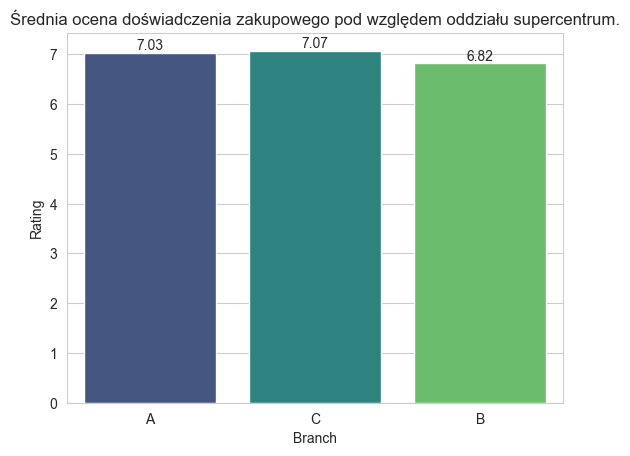

In [59]:
ax = sns.barplot(data=df, x='Branch', y='Rating', errorbar=None, estimator='mean', palette='viridis')
plt.title("Średnia ocena doświadczenia zakupowego pod względem oddziału supercentrum.")
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

Na tym wykresie także nie widać parkycznych różnic pomiędzy średnią oceną doświadczenia w zależnośći od oddziału supercentrum.

# Analiza metod płatności i dochodu brutto

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

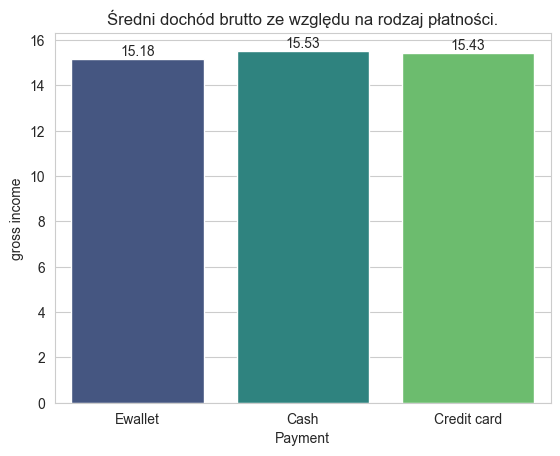

In [62]:
ax = sns.barplot(data=df, x='Payment', y='gross income', errorbar=None, estimator='mean', palette='viridis')
plt.title('Średni dochód brutto ze względu na rodzaj płatności.')
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

Średni dochód brutto nie różni się ze względu na rodzaj płatności, jest to sprzeczne z wiedzą domenową. Współcześnie większe zakupy są w znacznej większości płacone kartą. 

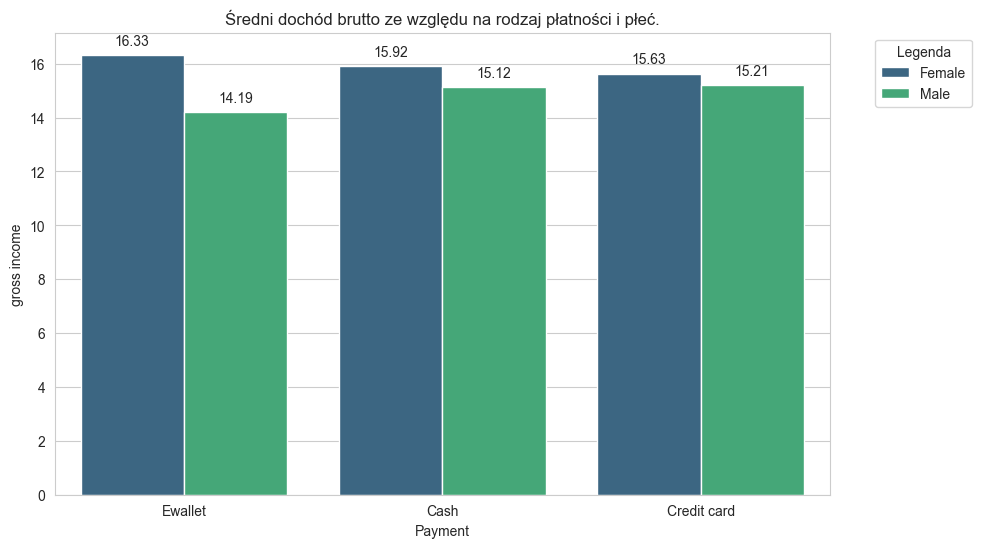

In [63]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=df, x='Payment', y='gross income', hue = 'Gender', errorbar=None, estimator='mean', palette='viridis')
plt.title('Średni dochód brutto ze względu na rodzaj płatności i płeć.')
plt.legend(title="Legenda", bbox_to_anchor=(1.05, 1), loc='upper left')
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

Na wykresie widzimy że płeć mało wpływa na średni dochód brutto w poszczególnych rodzajach płatności.

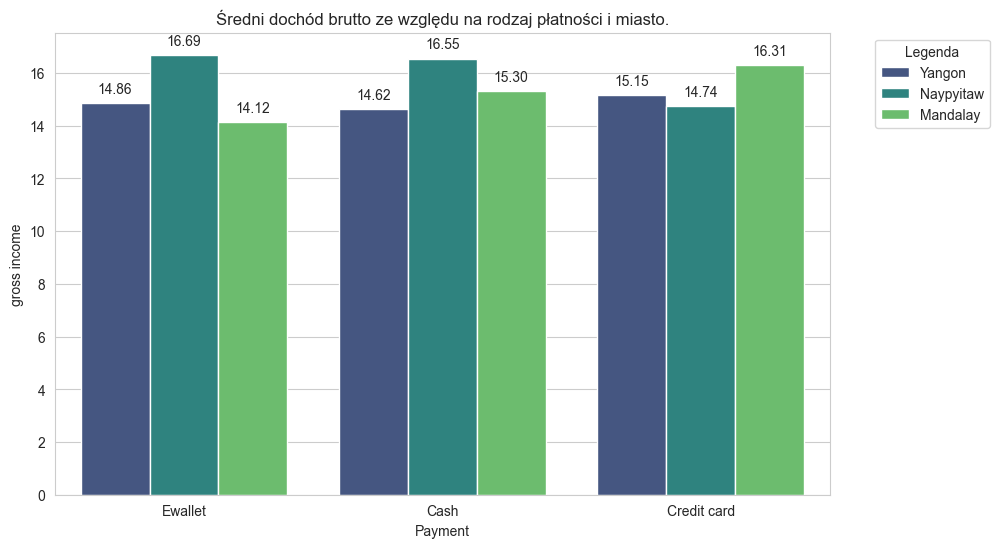

In [66]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=df, x='Payment', y='gross income', hue = 'City', errorbar=None, estimator='mean', palette='viridis')
plt.title('Średni dochód brutto ze względu na rodzaj płatności i miasto.')
plt.legend(title="Legenda", bbox_to_anchor=(1.05, 1), loc='upper left')
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

Na wykresie widzimy że poszczęgolne średnie wielkości dochodu brutto ze względu na rodzaj płatności różnią się w poszczególnych miastach.

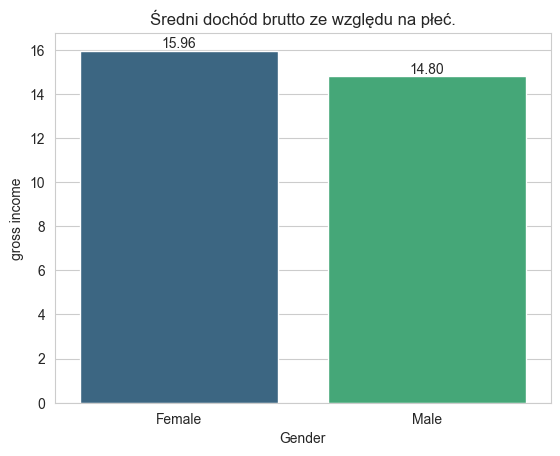

In [68]:
ax = sns.barplot(data=df, x='Gender', y='gross income', errorbar=None, estimator='mean', palette='viridis')
plt.title('Średni dochód brutto ze względu na płeć.')
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

Na wykresie widać różnicę w śrenim dochodzie brutto ze względu na płeć. W dalszej części sprawdzimy za pomocą testu statystycznego czy ta różnica jest statystycznie istotna.

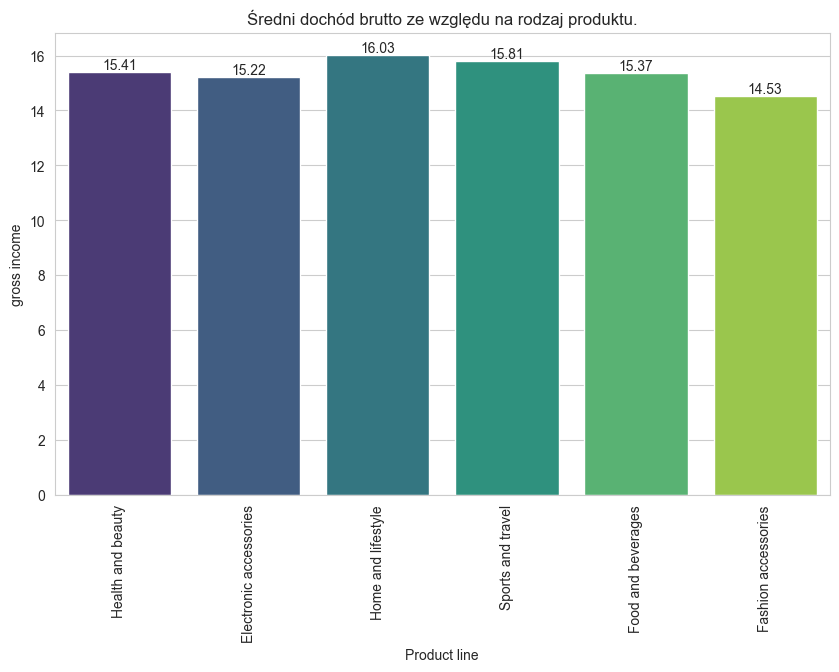

In [81]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=df, x='Product line', y='gross income', errorbar=None, estimator='mean', palette='viridis')
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')
plt.title('Średni dochód brutto ze względu na rodzaj produktu.')
plt.xticks(rotation=90)
plt.show()

Różnice pomiędzy średnim dochodem brutto ze względu a kategorią produktów są bardzo małe. Jest to sprzeczne z rzeczywistością ponieważ ceny produktów w tych kategoriach bardzo się różnią więc powinna istnieć zauważalna różnica.

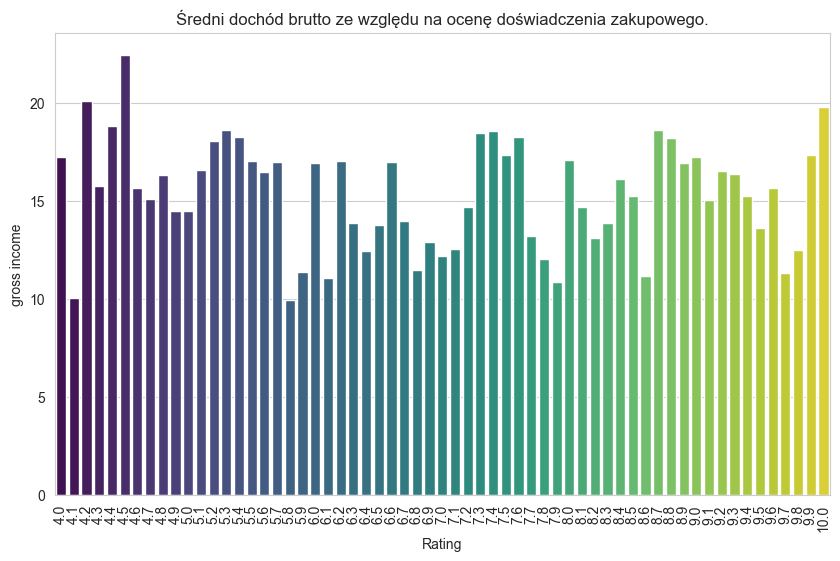

In [46]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Rating', y='gross income', errorbar=None, estimator='mean', palette='viridis')
plt.xticks(rotation=90)
plt.title('Średni dochód brutto ze względu na ocenę doświadczenia zakupowego.')
plt.show()

Z wykresu ciężko ocenić czy zadowolenie klienta ma jakiś realny wpływ na średni dochód brutto. W celu lepszej wizaulizacji podzieliliśmy ocenę na kategorie.

In [69]:

def map_rating_category(rating):
    if 4.0 <= rating < 5.0:
        return 'Category 4'
    elif 5.0 <= rating < 6.0:
        return 'Category 5'
    elif 6.0 <= rating < 7.0:
        return 'Category 6'
    elif 7.0 <= rating < 8.0:
        return 'Category 7'
    elif 8.0 <= rating < 9.0:
        return 'Category 8'
    elif 9.0 <= rating <= 9.9:
        return 'Category 9'
    elif rating == 10:
        return 'Category 10'
    else:
        return 'Other'
    
def map_rating_category2(rating):
    if 4.0 <= rating < 4.6:
        return 'Category 4'
    elif 4.6 <= rating < 5.6:
        return 'Category 5'
    elif 5.6 <= rating < 6.6:
        return 'Category 6'
    elif 6.6 <= rating < 7.6:
        return 'Category 7'
    elif 7.6 <= rating < 8.6:
        return 'Category 8'
    elif 8.6 <= rating < 9.6:
        return 'Category 9'
    elif rating >= 9.6:
        return 'Category 10'
    else:
        return 'Other'

# Zastosowanie mappera do kolumny "Rating"
df['Rating_Category'] = df['Rating'].apply(map_rating_category2)


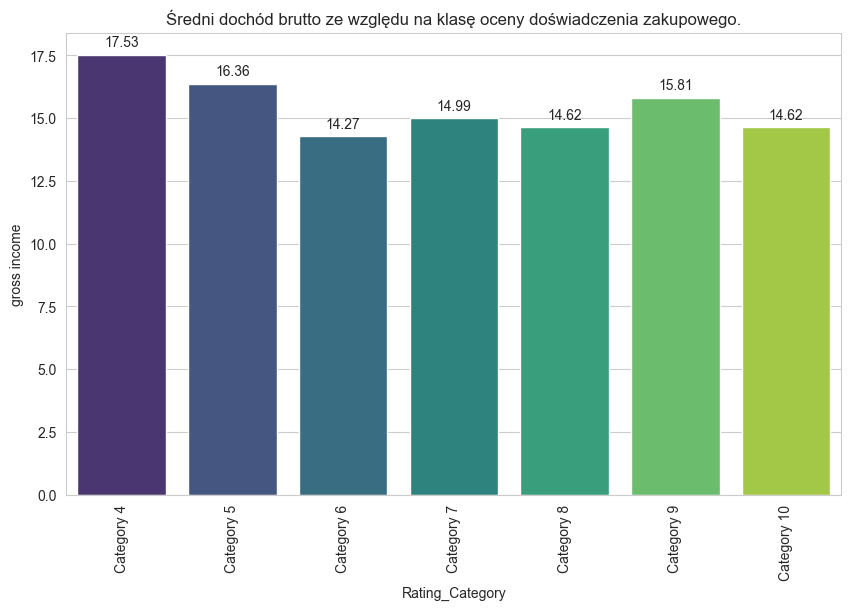

In [71]:

order_list = ['Category 4', 'Category 5', 'Category 6', 'Category 7',
       'Category 8', 'Category 9', 'Category 10']
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=df, x='Rating_Category', y='gross income', errorbar=None, estimator='mean', palette='viridis', order = order_list)
plt.xticks(rotation=90)
plt.title('Średni dochód brutto ze względu na klasę oceny doświadczenia zakupowego.')
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 9), textcoords='offset points')
plt.show()

Po podziale na kategorie wykres pokazuje że największy średni dochód brutto jest z klientów najmniej zadowolonych. Co jest sytuacją nie realistyczną.

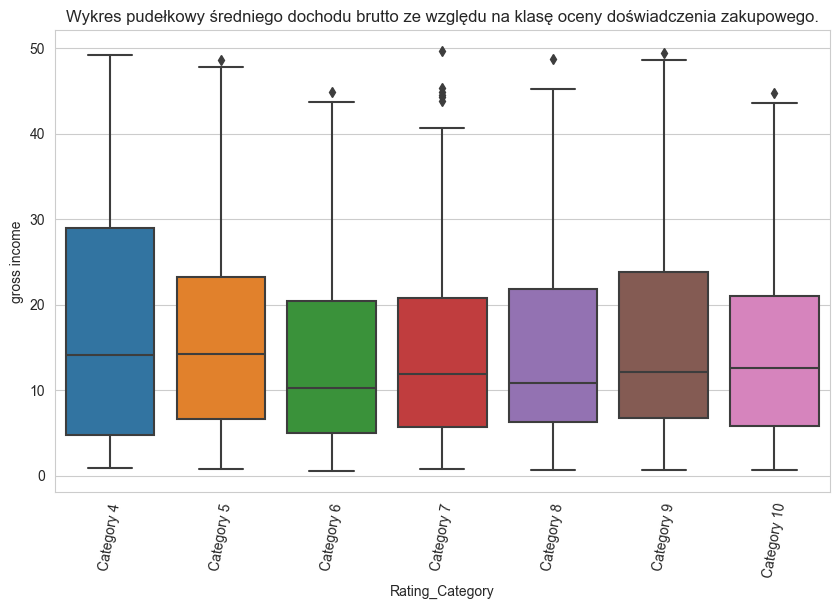

In [72]:
plt.figure(figsize=(10, 6))
sns.boxplot(data = df, x = 'Rating_Category', y = 'gross income', order = order_list)
plt.title('Wykres pudełkowy średniego dochodu brutto ze względu na klasę oceny doświadczenia zakupowego.')
plt.xticks(rotation=80)
plt.show()

Wykres pudełkowe pokazują że występują małe różnice pomiędzy kategoriami oceny doświadczenia zakupowego. W dalszej częśi sprawdzimy czy te różnice są istotnie statystycznie. 

# ANOVA
W projekcie zastosowaliśmy test ANOVA, aby ocenić, czy istnieją istotne statystycznie różnice między średnimi wartościami dochodu brutto w różnych grupach. Wyniki tego testu pomagają zrozumieć, czy dochody brutto są równomiernie rozłożone we wszystkich analizowanych grupach oceny doświadczenia zakupowego.

Hipoteza zerowa (H0): Średnie gross income są równe we wszystkich kategoriach.


Hipoteza alternatywna (H1): Istnieją różnice w średnich gross income między co najmniej dwiema kategoriami.

In [22]:
from scipy.stats import f_oneway

# Załóżmy, że masz DataFrame 'data' z kolumnami 'category' i 'gross_income'
result = f_oneway(*[df['gross income'][df['Rating_Category'] == category] for category in df['Rating_Category'].unique()])

print("Statystyka testowa F:", result.statistic)
print("P-wartość:", result.pvalue)

Statystyka testowa F: 1.24638385686862
P-wartość: 0.27995152773657034


Wartość P wynosi 0.28, jest większa przyjętego poziomu istotności wynoszącego 0.05. Nie odrzucami hipotezy zerowej. 

# T-test

W projekcie wykorzystujemy test t-studenta, aby ocenić, czy średnie wartości gross income są równe dla obu płci. Test ten umożliwia statystyczne porównanie różnic między dwiema grupami, w tym przypadku grupą mężczyzn i grupą kobiet. Wyniki t-testu pozwolą zidentyfikować ewentualne istotne różnice w średnich dochodach brutto między płciami.

Hipoteza zerowa (H0): Średnie gross income dla obu płci są równe.

Hipoteza alternatywna (H1): Średnie gross income dla obu płci nie są równe.

In [23]:
from scipy.stats import ttest_ind

# Załóżmy, że masz DataFrame 'data' z kolumnami 'gender' (mężczyzna/kobieta) i 'gross_income'
gross_income_male = df[df['Gender'] == 'Male']['gross income']
gross_income_female = df[df['Gender'] == 'Female']['gross income']

# Przeprowadź test t-Studenta
result = ttest_ind(gross_income_male, gross_income_female)

print("Statystyka testowa t:", result.statistic)
print("P-wartość:", result.pvalue)

Statystyka testowa t: -1.5641266415240969
P-wartość: 0.11810484577135821


Wartość P wynosi 0.11 i jest większa od przyjętego poziomu istoności wynoszącego 0.05. Nie odrzucamy hipotezy zerowej. 

### Dodatkowa analiza liczby zakupionych produktów ze względu na zadowolenie klienta

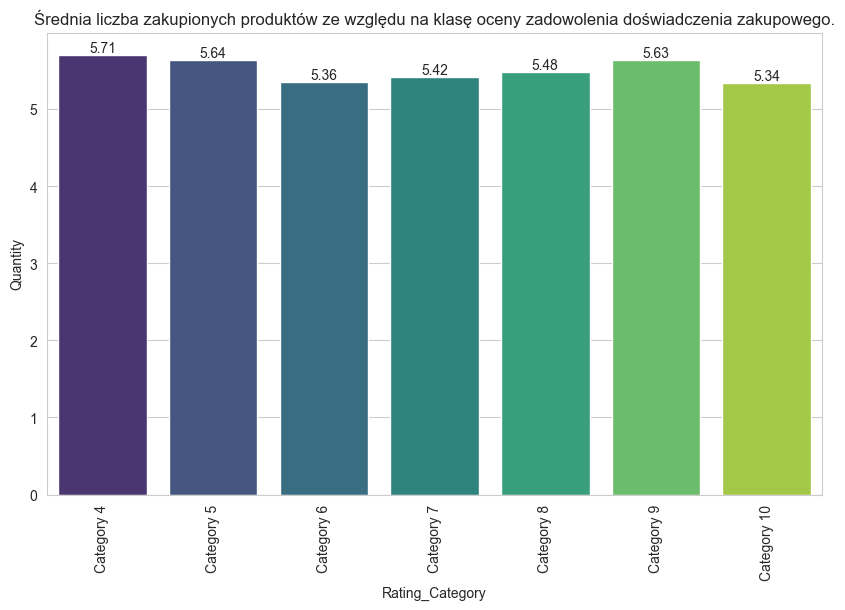

In [82]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=df, x='Rating_Category', y='Quantity', errorbar=None, estimator='mean', palette='viridis', order = order_list)
plt.xticks(rotation=90)
plt.title('Średnia liczba zakupionych produktów ze względu na klasę oceny zadowolenia doświadczenia zakupowego.')
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')
plt.show()

Na wykresie widać małe różnice w średniej liczbie zakupionych produktów ze względu na zadowolenie klienta, co jest sytuacją raczej nierealistyczną.